## k nearest neighbors algorithm

In [4]:
# k-nearest neighbors algorithm
# For every point in our dataset:
# calculate the distance between inX and the current point
# sort the distances in increasing order
# take k items with lowest distances to inX
# find the majority class among these items
# return the majority class as our prediction for the class of inX

from numpy import *
import operator

##### Create Dataset

In [5]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

###### Algorithm

In [6]:
# inX: input vector to classify
# dataSet: full matrix of training examples
# labels: vector of labels (should have as many elements in it as there are rows in dataSet matrix)
# k: number of nearest neighbors to use in voting

In [7]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # distance calculation
    diffMat = tile(inX, (dataSetSize,1)) - dataSet 
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort() # returns position of element that puts array in sorted order
    # voting with lowest k distances
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    # sort dictionary
    sortedClassCount = sorted(classCount, key=classCount.__getitem__,reverse=True)
    return sortedClassCount[0]

In [8]:
group, labels = createDataSet()

In [9]:
sortedClassCount = classify0([0,0],group,labels, 3)

In [11]:
sortedClassCount

'B'

###### Example - Dating Site

In [114]:
def file2matrix(filename):
    file = open(filename)
    num_lines = len(file.readlines())
    return_matrix = zeros((num_lines,3))
    class_label_vector = []
    file = open(filename)
    index = 0
    for line in file.readlines():
        line = line.strip()
        list_from_line = line.split('\t')
        return_matrix[index,:] = list_from_line[0:3]
        class_label_vector.append(list_from_line[-1])
        index += 1
    return return_matrix, class_label_vector

In [115]:
dating_data_mat, dating_labels = file2matrix('datingTestSet2.txt')

###### Plot Data

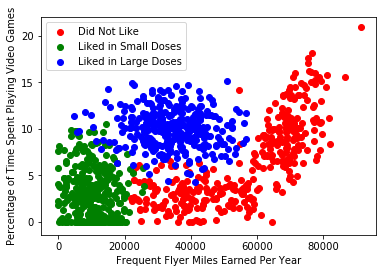

In [81]:
import matplotlib
import matplotlib.pyplot as plt
g1 = dating_data_mat[dating_data_mat[:,3] == 1]
g2 = dating_data_mat[dating_data_mat[:,3] == 2]
g3 = dating_data_mat[dating_data_mat[:,3] == 3]

fig = plt.figure()
ax = fig.add_subplot(111)
pl1 = ax.scatter(g1[:,0],g1[:,1],c="red")
pl2 = ax.scatter(g2[:,0],g2[:,1],c="green")
pl3 = ax.scatter(g3[:,0],g3[:,1],c="blue")
ax.legend([pl1,pl2,pl3],["Did Not Like", "Liked in Small Doses", "Liked in Large Doses"],loc=2)
plt.xlabel('Frequent Flyer Miles Earned Per Year')
plt.ylabel('Percentage of Time Spent Playing Video Games')
plt.show()

###### Normalization

In [82]:
# automatically normalize data to values between 0 and 1
# formula for this is new_value = (old_value-min)/(max-min)

In [116]:
def autoNorm(dataset):
    min_vals = dataset.min(0)
    max_vals = dataset.max(0)
    ranges = max_vals - min_vals
    norm_dataset = zeros(shape(dataset))
    m = dataset.shape[0]
    # use tile() function to create a matrix the same size as input matrix and then fill up with many copies
    # input matrix 1000x3, min_vals 1x3
    norm_dataset = dataset - tile(min_vals,(m,1))
    norm_dataset = norm_dataset/tile(ranges,(m,1))
    return norm_dataset, ranges, min_vals
    
    

In [117]:
norm_mat, ranges, min_vals = autoNorm(dating_data_mat)

###### Testing

In [93]:
# In classification, the error rate is # of misclassified pieces of data / total # of data points

In [126]:
def datingClassTest():
    ratio = 0.10
    dating_data_Mat,dating_labels = file2matrix('datingTestSet2.txt')
    norm_mat, ranges, min_vals = autoNorm(dating_data_mat)
    print(norm_mat)
    m = norm_mat.shape[0]
    num_test_vecs = int(m*ratio)
    error_count = 0.0
    for i in range(num_test_vecs):
        classifier_result = classify0(norm_mat[i,:],norm_mat[num_test_vecs:m,:],dating_labels[num_test_vecs:m],3)
        print("the classifier came back with: %s, the real answer is: %s" % (classifier_result, dating_labels[i]))
        if (classifier_result != dating_labels[i]): 
            error_count += 1.0
    print("the total error rate is: %f" % (error_count/float(num_test_vecs)))

In [127]:
datingClassTest()

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with:

###### Predictor

In [129]:
def classifyPerson():
    result_list = ['Run away', 'Ok for a drink', 'Get married']
    percent_vg = float(raw_input("% of time spent playing video games?"))
    ff_miles = float(raw_input("frequent flier miles earned/year?"))
    ice_cream = float(raw_input("litres of ice cream consumed/year?"))
    dating_data_Mat,dating_labels = file2matrix('datingTestSet2.txt')
    norm_mat, ranges, min_vals = autoNorm(dating_data_mat)
    in_arr = array([ff_miles, percent_vg, ice_cream])
    classifier_result = classify0((in_arr-min_vals)/ranges,norm_mat,dating_labels,3)
    print("You will probably like this person: ",result_list[classifier_result-1])
    